# Reducci√≥n de dimensionalidad para machine learning en Python
En este taller vamos a tener una vista general de como reducir las dimensiones de unos datos utilizando las librerias de Pandas y scitkit-learn. El objetivo es entender el proceso tipico y tambi√©n ver unas aplicaciones de reducci√≥n de dimensiones.

In [1]:
import pandas as pd
import plotnine as pn
from mizani.formatters import percent_format
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from pca import pca
from matplotlib import pyplot as plt

data_location = 'tweet_and_user_data.csv'

pd.options.display.max_columns = 500

In [2]:
tweet_data = pd.read_csv(data_location)

/home/andreas/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
tweet_data.shape

(40581, 56)

In [4]:
tweet_data.head()

id      conversation_id    created_at  \
0  1425590913959612419  1425590913959612419  1.628722e+12   
1  1427736867739299841  1427736867739299841  1.629234e+12   
2  1427667300488937476  1427667300488937476  1.629217e+12   
3  1427667012105371652  1427667012105371652  1.629217e+12   
4  1427497703596990467  1427497703596990467  1.629177e+12   

                  date  timezone place  \
0  2021-08-12 00:52:14       200   NaN   
1  2021-08-17 22:59:29       200   NaN   
2  2021-08-17 18:23:03       200   NaN   
3  2021-08-17 18:21:55       200   NaN   
4  2021-08-17 07:09:08       200   NaN   

                                               tweet language  \
0  RT @girlsalliance: We're so proud of the four ...       en   
1  Some casual suggestions to üòèSLIDEüòè into when u...       en   
2              RT @ValaAfshar: You are not your job.       en   
3  What have we become üòîüòÇ  Toddler Cites Freedom ...       en   
4  The tech giants that refuse to massively addre...       en   

                                 hashtags cashtags    user_id  user_id_str  \
0                                      []       []  409486555    409486555   
1  ['shoesdaytuesday', 'afterskewlslide']       []   21447363     21447363   
2                                      []       []   21447363     21447363   
3                                      []       []   21447363     21447363   
4                                      []       []   21447363     21447363   

        username            name  day  hour  \
0  MichelleObama  Michelle Obama    4     0   
1      katyperry      KATY PERRY    2    22   
2      katyperry      KATY PERRY    2    18   
3      katyperry      KATY PERRY    2    18   
4      katyperry      KATY PERRY    2     7   

                                                link  \
0  https://twitter.com/MichelleObama/status/14255...   
1  https://twitter.com/katyperry/status/142773686...   
2  https://twitter.com/katyperry/status/142766730...   
3  https://twitter.com/katyperry/status/142766701...   
4  https://twitter.com/katyperry/status/142749770...   

                                                urls  \
0                                                 []   
1                                                 []   
2                                                 []   
3  ['https://www.theonion.com/toddler-cites-freed...   
4                                                 []   

                                              photos  video  \
0                                                 []      0   
1  ['https://pbs.twimg.com/media/E9BXG4YVkAAl3_A....      1   
2                                                 []      0   
3                                                 []      0   
4                                                 []      0   

                                         thumbnail  retweet  nlikes  nreplies  \
0                                              NaN     True       0         0   
1  https://pbs.twimg.com/media/E9BXG4YVkAAl3_A.jpg    False    5266       368   
2                                              NaN     True       0         0   
3                                              NaN    False    5638       476   
4                                              NaN    False    8810       546   

   nretweets                                          quote_url search  near  \
0        232                                                  0   None   NaN   
1        408                                                  0   None   NaN   
2        764                                                  0   None   NaN   
3        438                                                  0   None   NaN   
4       1211  https://twitter.com/VICENews/status/1427311204...   None   NaN   

   geo  source    user_rt_id  \
0  NaN     NaN  1.047165e+18   
1  NaN     NaN           NaN   
2  NaN     NaN  2.597252e+08   
3  NaN     NaN           NaN   
4  NaN     NaN           NaN   

                               

Vamos a transformar nuestro base de datos de tweets en un conjunto orientado a los usuarios. Para esto vamos a agregar agrupando por los usuarios, primero creando unas variables. Luego utilizaremos la reducci√≥n de dimensiones para facilitar el analisis de estos usuarios.

In [5]:
tweet_data['number_hashtags'] = tweet_data.hashtags.str.count(',')
tweet_data['num_replies_to'] = tweet_data.reply_to.str.count('{')
tweet_data['num_photos'] = tweet_data.photos.str.count(',')
tweet_data['num_urls'] = tweet_data.urls.str.count(',')

tweet_data['tweet_length'] = tweet_data.tweet.str.len()

In [6]:
unique = ['id', 'conversation_id', 'retweet_id']
avg = ['nlikes', 'nreplies', 'nretweets', 'number_hashtags', 'num_replies_to', 'num_photos', 'num_urls']

gby = ['id_user', 'name_user', 'bio', 'join_date', 'following', 'followers', 'likes', 'tweets', 'media', 'location', 'verified']

agg = {col : 'nunique' if col in unique else 'mean' for col in unique + avg}

tweet_data['location'] = tweet_data.location.fillna('')

user_stats = tweet_data.groupby(gby).agg(agg).reset_index()

# Media de likes etc. para sus posts del pasado
user_stats['avg_likes'] = user_stats.likes / user_stats.tweets
user_stats['avg_media'] = user_stats.media / user_stats.tweets
user_stats['followers_per_tweet'] = user_stats.followers / user_stats.tweets
user_stats['num_days_created'] = (pd.to_datetime('2022-01-01') - pd.to_datetime(user_stats.join_date)).dt.days
user_stats['bio_length'] = user_stats.bio.str.len()

In [7]:
user_stats.head()

id_user          name_user  \
0       12             jack‚ö°Ô∏è   
1       13          Biz Stone   
2   428333  CNN Breaking News   
3   717313       Ars Technica   
4   742143   BBC News (World)   

                                                 bio   join_date  following  \
0                                           #bitcoin  2006-03-21       4406   
1              I‚Äôm a regular Joe but my name is Biz.  2006-03-21       1596   
2  Breaking news from CNN Digital. Now 61M strong...  2007-01-02        119   
3  Original news, reviews, analysis of tech trend...  2007-01-28       1330   
4  News, features and analysis from the World's n...  2007-02-01         18   

   followers  likes  tweets  media                     location  verified  \
0    5656510  35242   27756   2836                                   True   
1    2669130   7152    9768    911            San Francisco, CA      True   
2   61197525     27   75870  17019                   Everywhere      True   
3    1147218   8425  118653   6238  NYC - Boston - Chicago - SF      True   
4   32526661     13  332018  25403                   London, UK      True   

    id  conversation_id  retweet_id       nlikes    nreplies   nretweets  \
0   74               48          18  1699.081081  155.418919  574.175676   
1    7                5           1    13.000000    1.714286    1.714286   
2   66               65           1  1631.545455  417.424242  424.303030   
3  111              111          11    22.675676    1.702703   10.153153   
4  441              436          65   734.868481  103.995465  296.519274   

   number_hashtags  num_replies_to  num_photos  num_urls  avg_likes  \
0              0.0        1.445946    0.027027  0.000000   1.269707   
1              0.0        0.714286    0.000000  0.000000   0.732187   
2              0.0        0.000000    0.000000  0.000000   0.000356   
3              0.0        0.000000    0.000000  0.000000   0.071005   
4              0.0        0.000000    0.000000  0.002268   0.000039   

   avg_media  followers_per_tweet  num_days_created  bio_length  
0   0.102176           203.794135              5765           8  
1   0.093264           273.252457              5765          37  
2   0.224318           806.610320              5478         157  
3   0.052573             9.668681              5452         107  
4   0.076511            97.966559              5448         138

In [8]:
user_stats.shape, user_stats.id_user.nunique()

((796, 26), 796)

## El primer PCA
PCA es una de las grandes tecnicas para hacer reducci√≥n de dimensiones. Vamos a empezar aqu√≠ para ver el sintaxis de scikit-learn y entender exactamente que es el PCA.

In [9]:
variables = [col for col in user_stats if user_stats[col].dtypes in [int, float] and col not in ['id_user']]

I think maybe take the approach of grabbing all the components and simply progressing from there - focusing on how much we capture

In [10]:
pca_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('pca', PCA(random_state=0))
    ]
)

pca_pipeline.fit(user_stats[variables])

transformed_data = pd.DataFrame(pca_pipeline.transform(user_stats[variables]))
transformed_data.columns = [f'component_{i+1}' for i in range(transformed_data.shape[1])]

In [11]:
transformed_data

component_1  component_2  component_3  component_4  component_5  \
0       0.316859    -0.424299     2.324607     0.277264    -2.060014   
1      -0.462513    -0.514690     1.078425    -0.409850    -1.719207   
2       0.940947     0.548988    -0.673632     0.958332    -2.082091   
3       1.383151    -0.358575     0.569973    -1.075526    -0.740132   
4       6.500794     0.631367     0.165577    -0.453968    -1.445286   
..           ...          ...          ...          ...          ...   
791    -1.413062     0.016427    -1.152675     0.710434     2.823134   
792    -1.355287     0.184307    -1.401139     0.705201     2.771011   
793    -1.702429     1.409381    -1.774401     1.847495     2.739430   
794    -2.014884     0.771230    -2.425037     3.020503     2.957236   
795    -1.521670     0.435733    -2.819337     1.995564     4.291893   

     component_6  component_7  component_8  component_9  component_10  \
0       1.048841    -0.285958     0.371953     1.176407      1.336149   
1       0.687969     0.081162     0.538256     0.285983      0.731850   
2      -0.221178     1.965827     0.474597     0.543838     -1.332907   
3       0.105592     0.454027     0.314204    -0.374153     -0.429078   
4       0.162598     0.842171     0.017936     0.191168     -1.438165   
..           ...          ...          ...          ...           ...   
791    -1.119355    -2.236795    -1.196946    -0.132571      0.958762   
792    -2.388670    -2.638525    -1.647992     0.248454     -0.120825   
793    -3.031465    -2.298748    -1.668093     0.750537     -0.913644   
794    -3.300816    -2.476854    -1.675471     0.888109     -1.016511   
795    -2.417152    -3.499458    -1.489217    -0.006690      1.670410   

     component_11  component_12  component_13  component_14  component_15  \
0        0.246896     -0.429459      1.455417     -0.233486     -0.403052   
1       -0.599261     -0.513946      1.281090      0.114890     -0.059085   
2       -1.692363      1.033233     -1.421472     -1.654752      0.505090   
3       -0.924401      0.222707      0.497714      0.647185     -0.238928   
4        0.212704      1.770538     -0.378034      0.035072      0.526425   
..            ...           ...           ...           ...           ...   
791      1.823343     -0.418679     -1.844104     -0.314256      0.593394   
792      2.531612      0.160019     -2.743208      0.332593      0.421335   
793      2.250159      0.453289     -2.577863      1.073160      0.235592   
794      2.314955      0.482245     -1.548141      2.218800     -0.342245   
795      2.134496     -1.475890     -2.084103     -1.818999      0.065605   

     component_16  component_17  component_18  component_19  component_20  
0        0.028637      0.353318     -0.108595     -0.006576      0.029970  
1       -0.021072      0.216331     -0.155564      0.010878     -0.022950  
2       -0.120198      0.038139      0.152241     -0.114846      0.004904  
3       -0.135174      0.066600      0.642764      0.032103     -0.013100  
4       -0.332054      0.190590      1.997584     -0.010420     -0.082612  
..            ...           ...           ...           ...           ...  
791      0.097260     -0.093307      0.286971     -0.047171     -0.006530  
792      0.132507     -0.405591      0.007907     -0.101946     -0.009354  
793      0.700470     -0.389675      0.039417     -0.074730     -0.024481  
794      0.117787     -0.915236      0.093832     -0.043428      0.006988  
795     -0.009125      0.702353      0.951335     -0.095322     -0.005875  

[796 rows x 20 columns]

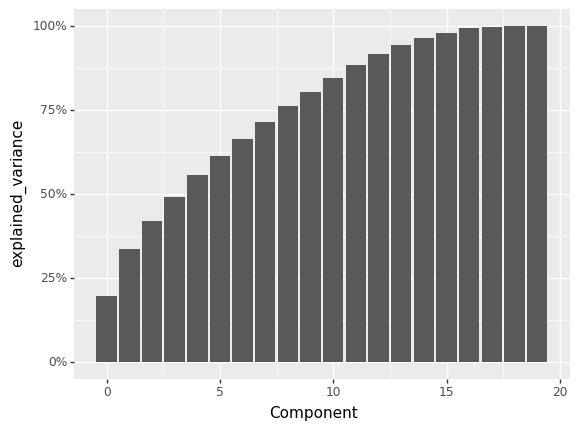

In [12]:
graph_data = pd.DataFrame(pca_pipeline['pca'].explained_variance_ratio_.cumsum(), columns=['explained_variance']).reset_index()

graph = pn.ggplot(graph_data, pn.aes(x='index', y='explained_variance')) + pn.geom_col() + pn.xlab('Component') + pn.scale_y_continuous(labels=percent_format())
graph.draw();

Cuando no especificamos ning√∫n n√∫mero de componentes el PCA devuelve todos los posibles. Visualizamos cuanto de la varianza cada componente explica y vemos que los primeros son los m√°s importantes y luego cada uno aporta menos informaci√≥n.

Vamos a intentar visualizar datos en terminos de los diferentes componentes en un grafico.

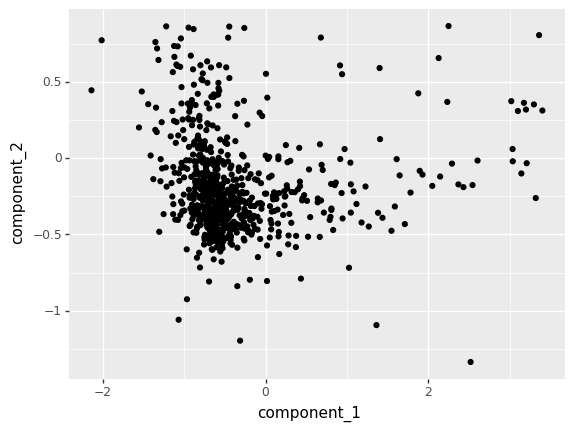

In [13]:
limit_x = transformed_data.component_1.quantile(0.95)
limit_y = transformed_data.component_2.quantile(0.95)

condition = (transformed_data.component_1 < limit_x) & (transformed_data.component_2 < limit_y)

graph = (
    pn.ggplot(transformed_data[condition], pn.aes(x='component_1', y='component_2'))
    + pn.geom_point()
)

graph.draw();

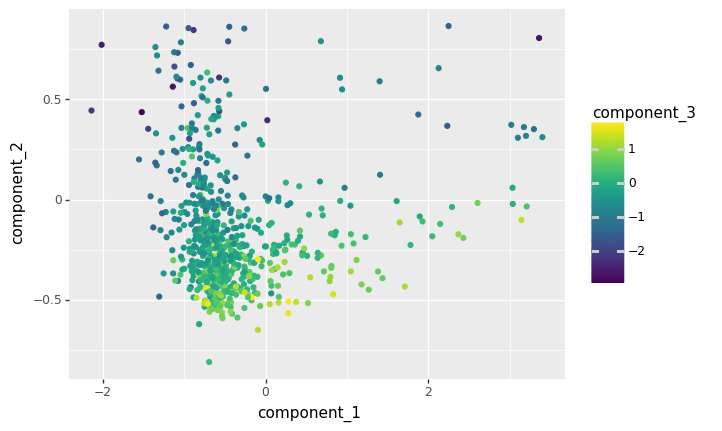

In [14]:
limit_x = transformed_data.component_1.quantile(0.95)
limit_y = transformed_data.component_2.quantile(0.95)
limit_z = transformed_data.component_3.quantile(0.95)

condition = (transformed_data.component_1 < limit_x) & (transformed_data.component_2 < limit_y) & (transformed_data.component_3 < limit_z)

graph = (
    pn.ggplot(transformed_data[condition], pn.aes(x='component_1', y='component_2', color='component_3'))
    + pn.geom_point()
)

graph.draw();

Apreciamos que algunos de los datos se ubican en las partes extremas de estos primeros componentes.

Que relacion tienen los componentes con nuestras variables iniciales? Para esto tenemos el biplot. Para visualizarlo, vamos a aprovechar de una libreria que se llama "PCA".

In [15]:
model = pca(n_components=3)
scaler = preprocessing.StandardScaler()
results = model.fit_transform(scaler.fit_transform(user_stats[variables]))

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [20] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


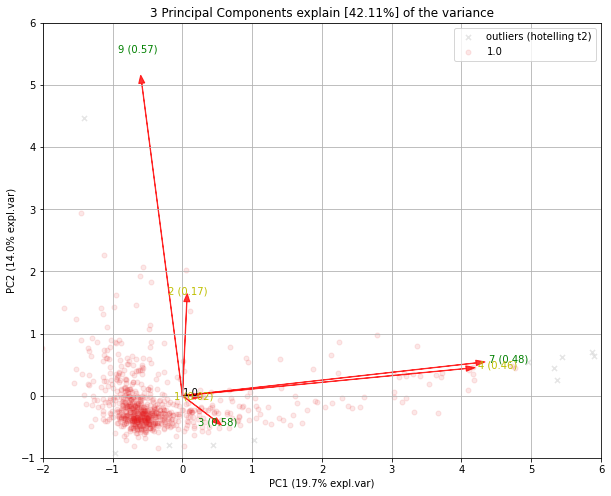

In [16]:
fig, ax = model.biplot(n_feat=6, alpha_transparency=0.1, hotellingt2=True, visible=False)
ax.set_xlim([-2, 6])
ax.set_ylim([-1, 6])
fig.set_visible(True)

Las flechas indican nuestras variables iniciales y podemos entender que ciertas variables tienen una correlacion alta con los componentes. Esto ayuda en explicar que variables son las m√°s importantes a la hora de explicar la varianza.

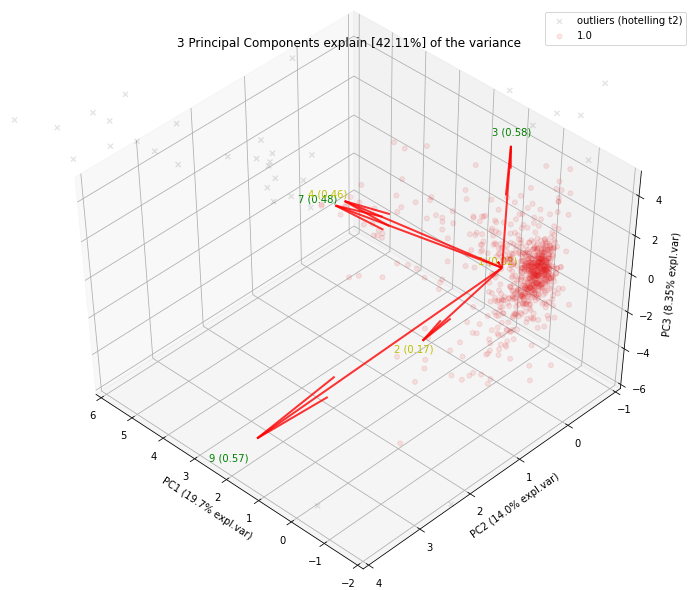

In [17]:
fig, ax = model.biplot(n_feat=6, alpha_transparency=0.1, hotellingt2=True, d3=True, visible=False)
ax.set_xlim([-2, 6])
ax.set_ylim([-1, 4])
ax.set_zlim([-6, 5])
fig.set_visible(True)

In [18]:
nums = [2, 3, 4, 7, 9]
[(num, variables[num]) for num in nums]

[(2, 'likes'), (3, 'tweets'), (4, 'media'), (7, 'retweet_id'), (9, 'nreplies')]

Aqu√≠ vemos lo mismo pero en 3D. Entendemos que nuestros primeros 3 componentes principalmente se definen por:

* El n√∫mero de retweets
* El n√∫mero de respuestas de media
* El n√∫mero de tweets

Esto es bastante interesante porque corresponde bien con 3 tipos de tweet diferente que se puede hacer, en general. Entonces entendemos que nuestro conjunto de usuarios principalmente se explican por estas variables.

## T-SNE
El algoritmo de t-SNE crea una descripci√≥n de nuestros datos en un embedding de tipicamente 2 o 3 dimensiones. Esto nos permite visualizar datos de altas dimensiones en un espacio reducido. Generalmente se recomienda aplicar un PCA primero para mejorar el rendimiento del algoritmo. Con nuestros datos seguramente no har√° mucha diferencia pero lo haremos para mostrar c√≥mo.

In [19]:
ncomponents = 2
tsne_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('pca', PCA(random_state=0)),
        ('tsne', TSNE(ncomponents, random_state=0))
    ]
)

cols = ['component_' + str(i + 1) for i in range(ncomponents)]
transformed_data = pd.DataFrame(tsne_pipeline.fit_transform(user_stats[variables]), columns=cols)

In [20]:
transformed_data = pd.concat([transformed_data, user_stats[['name_user'] + variables]], axis=1)

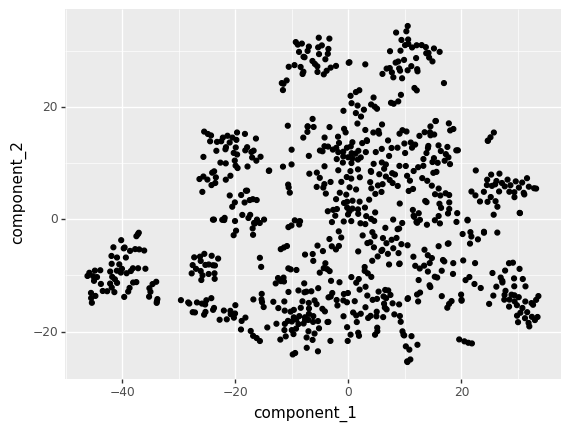

In [21]:
graph = (
    pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2'))
    + pn.geom_point()
)

graph.draw();

Vemos c√≥mo ahora tenemos una distribucion en 2 dimensiones bastante diferente a antes. En vez de estar todos los puntos concentrados en unas pocas partes del grafico, tenemos una distribucion mejor. Esto es gracias al algortmo que busca separar puntos diferentes y juntar puntos similares.

Vamos a poner un color a los puntos que corresponde a las variables que vimos que eran importantes antes.

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log


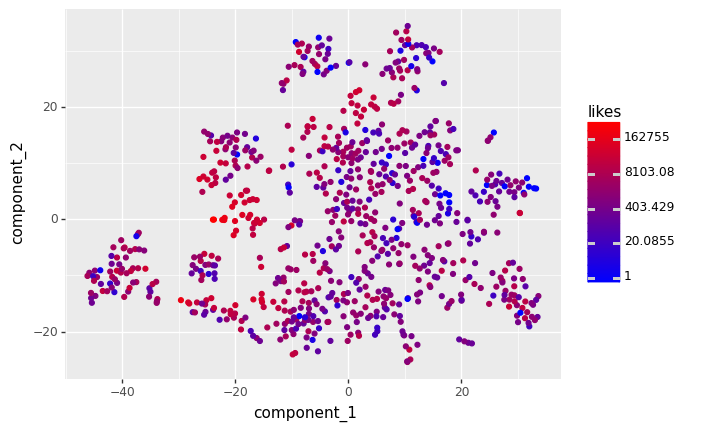

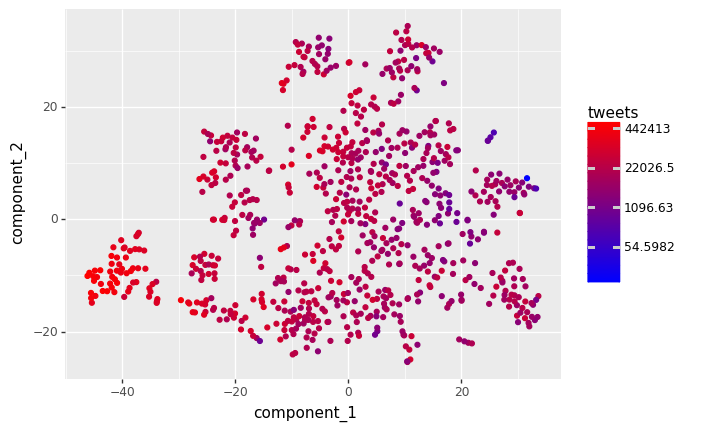

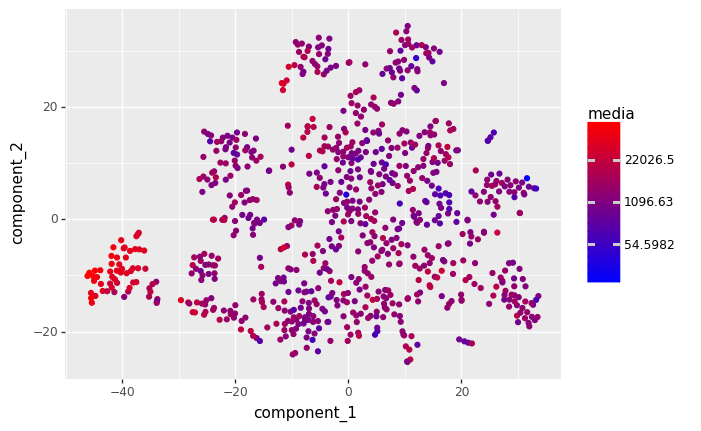

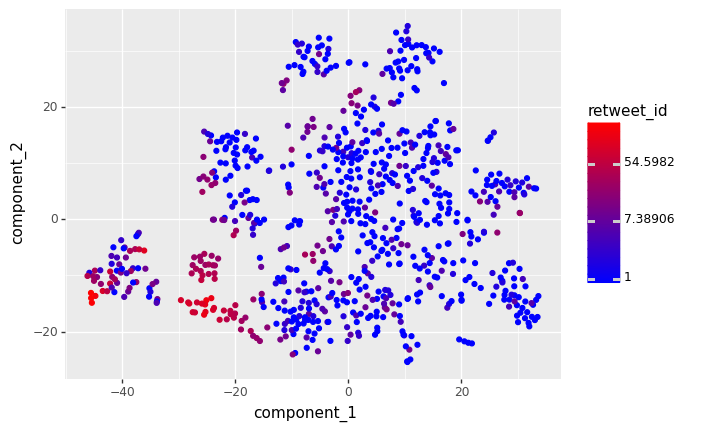

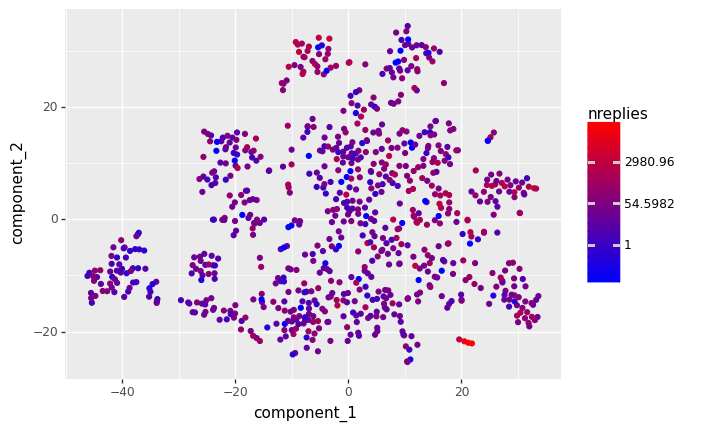

In [22]:
vis_vars = [variables[num] for num in nums]
for variable in vis_vars:
    graph = (
        pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2', color=variable))
        + pn.geom_point()
        + pn.scale_color_gradient(trans='log', low='blue', high='red')
    )

    graph.draw();

Vemos c√≥mo algunos grupos de puntos tienen un color m√°s unificado que otros. Esto nos permite entender m√°s o menos c√≥mo se construye este mapa en base de las variables originales. Vemos, por ejemplo, que el n√∫mero de retweets corresponde bien con el eje X.

## Clustering
Vamos a aprovechar de esta reducci√≥n de dimensiones para hacer un clustering de los datos. No queremos ir en mucha profunidad de c√≥mo hacer clustering, pero vamos a aprovechar del algoritmo de DBSCAN. Este algoritmo agrupa los puntos en base de una distancia minima entre los puntos y no requiere que especifiquemos un n√∫mero de clusters apriori.

Lo otro interesante de este algoritmo es que es capaz de identificar que puntos no pertenecen a ning√∫n cluster.

In [23]:
X_variables = ['component_1', 'component_2']

kmeans_tsne_pipeline = Pipeline(
    [
        ('scaler', preprocessing.StandardScaler()),
        ('cluster', DBSCAN(0.21, min_samples=12))
    ]
)

predictions = kmeans_tsne_pipeline.fit_predict(transformed_data[X_variables])
pd.DataFrame(predictions).value_counts()

 4     367
-1      85
 0      58
 6      47
 2      42
 5      38
 11     36
 1      32
 3      27
 8      25
 7      19
 9      12
 10      8
dtype: int64

In [24]:
transformed_data['predictions_clusters'] = predictions.astype(str)

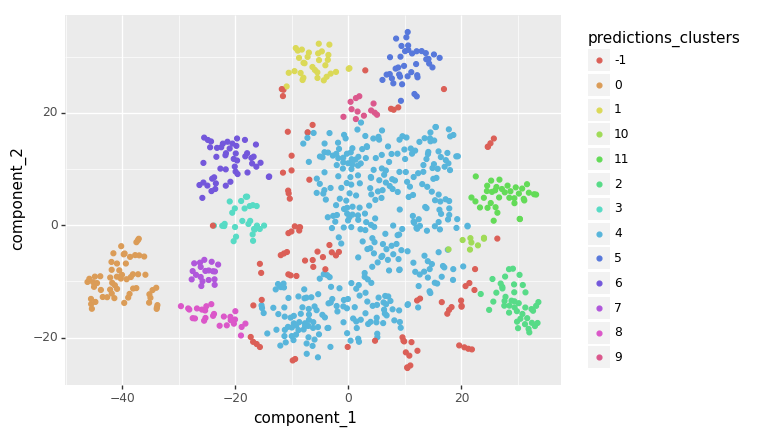

In [25]:
graph = (
    pn.ggplot(transformed_data, pn.aes(x='component_1', y='component_2', color='predictions_clusters'))
    + pn.geom_point()
)

graph.draw();

Dibujando los resultados y vemos que el algoritmo ha sido capaz de identificar unos clusters bastante claros. Parece ser que existe una gran masa de usuaros tipicos en el centro (el cluster 4) y luego tenemos grupos de usuarios en los diferentes lados. Los puntos en rojo (-1) son los que no acaban de pertenecer a ning√∫n grupo especifico.

Y qu√© son estos clusters? Vamos a analizar los clusters en base de las variables originales:

In [26]:
cols = [col for col in transformed_data if col not in X_variables + ['predictions_clusters']]

In [27]:
transformed_data.groupby('predictions_clusters')[cols].mean()

following     followers         likes         tweets  \
predictions_clusters                                                            
-1                    78830.858824  9.706217e+06  11653.011765   30297.470588   
0                      7181.379310  8.502608e+06   5875.120690  219199.362069   
1                     34627.906250  5.933582e+07   3747.656250   21200.437500   
10                      150.750000  8.427262e+06    636.250000    3170.500000   
11                     1424.277778  2.607978e+06   2263.361111    7938.722222   
2                      1244.833333  7.802508e+06   3977.642857   13600.214286   
3                      1544.333333  6.361833e+06  72831.481481   22475.000000   
4                      3928.310627  6.071601e+06   3074.441417   18004.092643   
5                      1592.973684  5.838379e+06   2607.157895   15431.500000   
6                      5289.106383  5.876516e+06  11013.000000   30580.638298   
7                      5157.736842  7.927339e+06   4430.894737   40614.736842   
8                      5403.320000  5.083184e+06  22971.120000   77379.240000   
9                      4015.166667  6.825343e+06  22828.333333   31496.333333   

                             media          id  conversation_id  retweet_id  \
predictions_clusters                                                          
-1                     5821.576471   30.764706        27.435294    5.764706   
0                     68559.448276  404.758621       384.844828   28.603448   
1                      4612.343750   18.312500        14.406250    1.656250   
10                     2072.125000   18.875000        17.875000    2.250000   
11                     1917.972222   19.555556        18.000000    3.416667   
2                      2705.833333    6.547619         6.214286    0.857143   
3                      2685.814815   22.074074        18.888889    5.333333   
4                      2660.874659   11.901907        11.141689    2.002725   
5                      1963.394737    6.421053         5.815789    0.605263   
6                      2280.425532   39.191489        22.531915    3.978723   
7                      2993.263158   70.526316        62.631579   33.789474   
8                      8810.280000  144.600000       136.320000   74.440000   
9                      3262.500000   17.166667        16.833333    8.833333   

                            nlikes     nreplies    nretweets  number_hashtags  \
predictions_clusters                                                            
-1                    35627.136133  2422.615670  8094.441676         0.148620   
0                       405.101863    23.456223    63.547951         0.037599   
1                     27243.230914   770.499297  2929.560236         0.128566   
10                    19156.449504   298.587135  1916.800272         0.453763   
11                     3348.543659   418.576780   625.418595         0.054827   
2                      3324.056772   101.549362   343.550643         0.131220   
3                      2340.468375    55.584945   475.418548         0.098990   
4                      4132.901624   127.415857   651.106494         0.061327   
5                      1536.992017    71.373249   217.568957         1.647751   
6                      2082.347545    75.686504   222.141064         0.029302   
7                       920.701443    36.883410   322.202008         0.098066   
8                       616.997332    39.629744   449.522902         0.104150   
9                      2054.659968    69.279948   499.633813         0.321522   

                      num_replies_to  num_photos  num_urls  avg_likes  \
predictions_clusters                                                    
-1                          0.096231    0.135898  0.085778   0.456742   
0                           0.037293    0.013458  0.006593   0.040664   
1                           0.192359    0.088942  0.002275   0.174407   
10                          0.093750    0.

In [28]:
transformed_data.groupby('predictions_clusters')[vis_vars].mean()

likes         tweets         media  retweet_id  \
predictions_clusters                                                          
-1                    11653.011765   30297.470588   5821.576471    5.764706   
0                      5875.120690  219199.362069  68559.448276   28.603448   
1                      3747.656250   21200.437500   4612.343750    1.656250   
10                      636.250000    3170.500000   2072.125000    2.250000   
11                     2263.361111    7938.722222   1917.972222    3.416667   
2                      3977.642857   13600.214286   2705.833333    0.857143   
3                     72831.481481   22475.000000   2685.814815    5.333333   
4                      3074.441417   18004.092643   2660.874659    2.002725   
5                      2607.157895   15431.500000   1963.394737    0.605263   
6                     11013.000000   30580.638298   2280.425532    3.978723   
7                      4430.894737   40614.736842   2993.263158   33.789474   
8                     22971.120000   77379.240000   8810.280000   74.440000   
9                     22828.333333   31496.333333   3262.500000    8.833333   

                         nreplies  
predictions_clusters               
-1                    2422.615670  
0                       23.456223  
1                      770.499297  
10                     298.587135  
11                     418.576780  
2                      101.549362  
3                       55.584945  
4                      127.415857  
5                       71.373249  
6                       75.686504  
7                       36.883410  
8                       39.629744  
9                       69.279948

In [29]:
transformed_data.groupby('predictions_clusters')[vis_vars].mean().rank(ascending=False)

likes  tweets  media  retweet_id  nreplies
predictions_clusters                                            
-1                      4.0     6.0    3.0         5.0       1.0
0                       6.0     1.0    1.0         3.0      13.0
1                       9.0     8.0    4.0        11.0       2.0
10                     13.0    13.0   11.0         9.0       4.0
11                     12.0    12.0   13.0         8.0       3.0
2                       8.0    11.0    7.0        12.0       6.0
3                       1.0     7.0    8.0         6.0      10.0
4                      10.0     9.0    9.0        10.0       5.0
5                      11.0    10.0   12.0        13.0       8.0
6                       5.0     5.0   10.0         7.0       7.0
7                       7.0     3.0    6.0         2.0      12.0
8                       2.0     2.0    2.0         1.0      11.0
9                       3.0     4.0    5.0         4.0       9.0

In [30]:
prct_changes = ((transformed_data.groupby('predictions_clusters')[vis_vars].mean() - transformed_data[vis_vars].mean()) / transformed_data[vis_vars].mean()).reset_index()
graph_data = pd.melt(prct_changes, 'predictions_clusters')

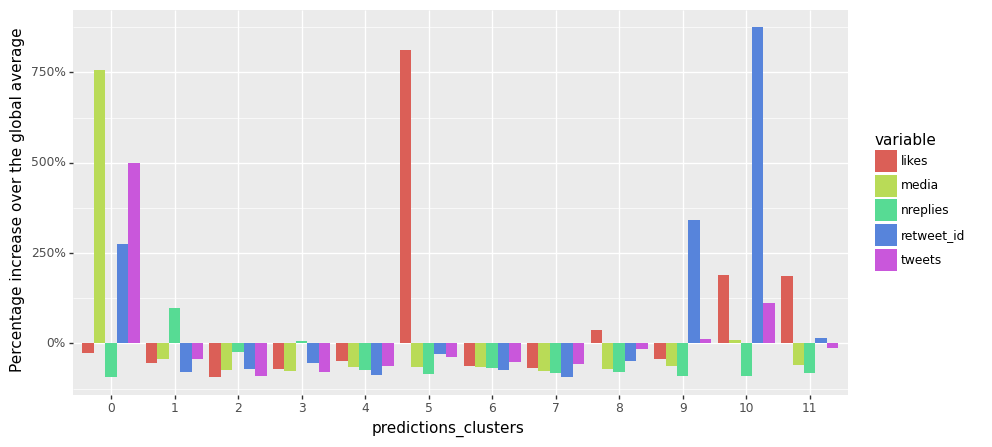

In [31]:
graph = (
    pn.ggplot(graph_data[graph_data.predictions_clusters != '-1'], pn.aes(x='predictions_clusters', y='value', fill='variable'))
    + pn.geom_col(position='dodge')
    + pn.theme(figure_size=(10, 5))
    + pn.scale_y_continuous(labels=percent_format())
    + pn.scale_x_discrete(labels=[str(i) for i in range(12)])
    + pn.ylab('Percentage increase over the global average')
)

graph.draw();

Cogiendo las principales variables que vimos antes, vemos cosas como:

* Muchos de los clusters tienen un valor muy fuerte en alguna variable, como el 5 tiene un n√∫mero de likes muy por encima de la media, o el 9 y 10 con retweets, o el 0 con media
* Luego, muchos tambi√©n tienen una mezcla de cosas √∫nicas, como el 2 yel 3 siendo un n√∫mero regular de todo pero con m√°s "replies" que lo normal, o el 8 con pocos tweeets pero muchos likes

Podemos visualizar las cuentas que se destacan dentro de cada cluster

In [33]:
transformed_data[transformed_data.predictions_clusters == '0'].sort_values('tweets', ascending=False)['name_user'].head()

105                  Slate
8       The New York Times
12                Mashable
15                Fox News
17     The Washington Post
Name: name_user, dtype: object

In [32]:
transformed_data[transformed_data.predictions_clusters == '5'].sort_values('tweets', ascending=False)['name_user'].head()

111        Deepak Chopra
627    EL MORENO MICHAEL
486        Oscar D' Leon
541      German Paoloski
103           Jota Quest
Name: name_user, dtype: object

In [36]:
transformed_data[transformed_data.predictions_clusters == '10'].sort_values('tweets', ascending=False)['name_user'].head()

677          Heidi Klum
716    Carrie Underwood
710         Joko Widodo
695        Yusuf Mansur
774       Karim Benzema
Name: name_user, dtype: object

Apreciamos por ejemplo que el 0 son mayormente prensa, el 5 parecen que famosa de paises no ingleses y el 10 otra vez gente famosa, pero con otras tendencias de usar twitter.